# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [7]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
# Inspect the shapes of the datasets
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


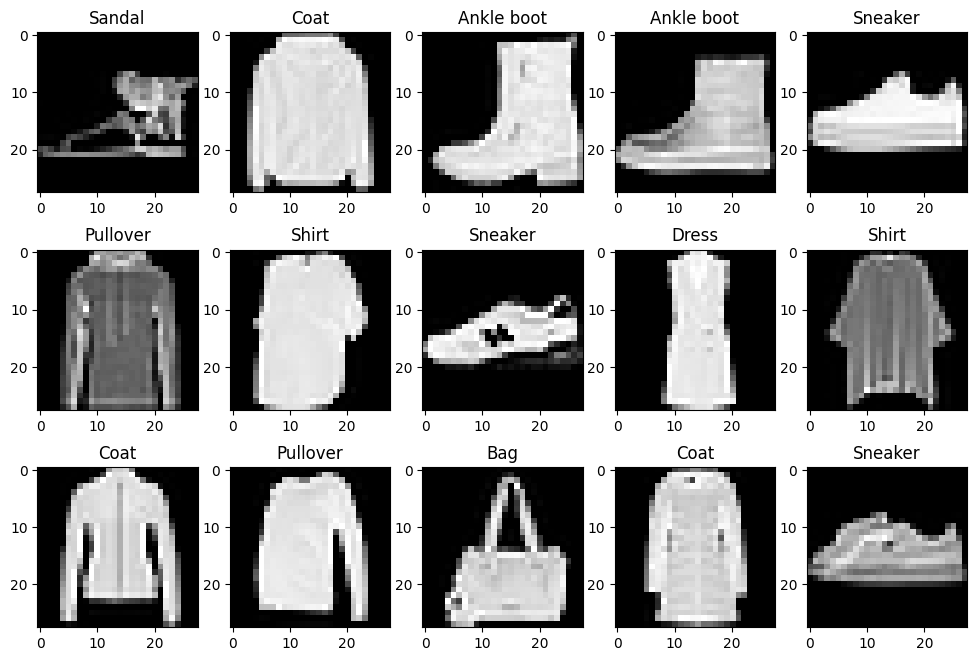


Pixel value statistics:
Min value: 0.0
Max value: 1.0
Mean value: 0.286
Std value: 0.353


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Verify the data looks as expected
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
axes = axes.flatten()

for i in range(15):
    idx = np.random.randint(0, len(X_train))
    img = X_train[idx]
    label = y_train[idx]
    
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"{class_names[label]}")

plt.show()

print("\nPixel value statistics:")
print(f"Min value: {X_train.min()}")
print(f"Max value: {X_train.max()}")
print(f"Mean value: {X_train.mean():.3f}")
print(f"Std value: {X_train.std():.3f}")

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

- data looks okay. Quality of images is low. It seems like x-ray image of actual image.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images into a 784-dimensional vector
# You can use `model.add(<layer>)` to add layers to the model
model.add(Dense(10, input_shape=(784,)))  # Output layer with 10 classes 
model.add(Dense(10, input_shape=(784,)))  # Output layer with 10 classes

#It seems without activation function, the model is not learning properly.
# 
# #model.add(Dense(10, activation="softmax", input_shape=(28, 28)))

model.summary()

# Compile the model using `model.compile()`
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with `model.fit()`
model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, validation_data=(X_test, y_test_onehot))

# Evaluate the model with `model.evaluate()`
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test accuracy: {test_accuracy:.3f}")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2387 - loss: 7.2748 - val_accuracy: 0.3365 - val_loss: 6.1363
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.3486 - loss: 7.0598 - val_accuracy: 0.3443 - val_loss: 6.8824
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.3507 - loss: 7.0361 - val_accuracy: 0.3458 - val_loss: 7.0001
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.3506 - loss: 7.4933 - val_accuracy: 0.3470 - val_loss: 9.1502
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.3379 - loss: 9.0009 - val_accuracy: 0.2051 - val_loss: 9.2292
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.2060 - loss: 9.3616 - val_accuracy: 0.2051 - val_loss: 9.2292
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.2060 - loss: 9.3616 - val_accuracy: 0.2051 - val_loss: 9.2292
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.2060 - l

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

-   Performance of model is 85%. I have no expectations, compared to that 85% seems great. It seems deep learning method have performed well.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten before fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

# Train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32, validation_data=(X_test, y_test_onehot))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test accuracy: {test_accuracy:.3f}")

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8593 - loss: 0.4035 - val_accuracy: 0.8786 - val_loss: 0.3424
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9016 - loss: 0.2734 - val_accuracy: 0.8862 - val_loss: 0.2994
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9167 - loss: 0.2275 - val_accuracy: 0.9017 - val_loss: 0.2731
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9269 - loss: 0.1965 - val_accuracy: 0.9121 - val_loss: 0.2451
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9369 - loss: 0.1693 - val_accuracy: 0.9102 - val_loss: 0.2586
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9102 - loss: 0.2586
Test accuracy: 0.910


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**CNN definitely peformed better than baseline model. Performance went up from 20% to 91%. Using convulutional network contributed to this improvement. Baseline model is just linear model and have no activation layer**

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

##### Testing with 3 * 3 Kernel

In [19]:
# A. Test Hyperparameters

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_acc = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"  Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"  Test Loss: {test_loss:.4f}")
print(f"  Total Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8202 - loss: 0.5058 - val_accuracy: 0.8746 - val_loss: 0.3573
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8840 - loss: 0.3267 - val_accuracy: 0.8902 - val_loss: 0.3138
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8993 - loss: 0.2808 - val_accuracy: 0.8946 - val_loss: 0.2950
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9106 - loss: 0.2480 - val_accuracy: 0.9022 - val_loss: 0.2757
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9179 - loss: 0.2273 - val_accuracy: 0.9042 - val_loss: 0.2655
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9265 - loss: 0.2031 - val_accuracy: 0.9057 - val_loss: 0.2670
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 29s 87ms/step - accuracy: 0.9321 - loss: 0.1870 - val_accuracy: 0.9082 - val_loss: 0.2624
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 36s 110ms/step - accuracy: 0.9370 - loss: 0.1709 - val_

##### Testing with 4 * 4 Kernel

In [20]:
# A. Test Hyperparameters

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_acc = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"  Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"  Test Loss: {test_loss:.4f}")
print(f"  Total Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.8253 - loss: 0.4974 - val_accuracy: 0.8669 - val_loss: 0.3657
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.8847 - loss: 0.3242 - val_accuracy: 0.8777 - val_loss: 0.3347
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8971 - loss: 0.2816 - val_accuracy: 0.8972 - val_loss: 0.2885
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.9091 - loss: 0.2500 - val_accuracy: 0.9044 - val_loss: 0.2708
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9166 - loss: 0.2272 - val_accuracy: 0.9057 - val_loss: 0.2646
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9236 - loss: 0.2089 - val_accuracy: 0.9061 - val_loss: 0.2676
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9297 - loss: 0.1907 - val_accuracy: 0.9092 - val_loss: 0.2566
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9365 - loss: 0.1743 - val_accu

##### Testing with 5 * 5 Kernel

In [21]:
# A. Test Hyperparameters

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_acc = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"  Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"  Test Loss: {test_loss:.4f}")
print(f"  Total Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8167 - loss: 0.5263 - val_accuracy: 0.8623 - val_loss: 0.3886
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.8769 - loss: 0.3485 - val_accuracy: 0.8772 - val_loss: 0.3439
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.8909 - loss: 0.3060 - val_accuracy: 0.8960 - val_loss: 0.2982
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.8985 - loss: 0.2794 - val_accuracy: 0.8945 - val_loss: 0.2992
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9071 - loss: 0.2540 - val_accuracy: 0.8953 - val_loss: 0.2931
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9167 - loss: 0.2275 - val_accuracy: 0.9037 - val_loss: 0.2785
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9210 - loss: 0.2145 - val_accuracy: 0.9045 - val_loss: 0.2654
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9292 - loss: 0.1935 - val_

### Kernel Evaluation
|Kernel Size |Accuracy (%)|
|:-----|:----:|
| 3 X 3 | 90.48% |
| 4 X 4 | 90.34% |
| 5 X 5 | 90.75% |

- Based on above info, changing kernel size didn't make much difference. However 5 X 5 posted best accuracy rate.

#### 15% Drop

In [22]:
# B. Test presence or absence of regularization
from keras.layers import Dropout

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Dropout(0.15))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_acc = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"  Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"  Test Loss: {test_loss:.4f}")
print(f"  Total Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8200 - loss: 0.5139 - val_accuracy: 0.8696 - val_loss: 0.3707
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8805 - loss: 0.3385 - val_accuracy: 0.8876 - val_loss: 0.3166
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.8931 - loss: 0.3011 - val_accuracy: 0.8949 - val_loss: 0.3006
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9029 - loss: 0.2692 - val_accuracy: 0.9033 - val_loss: 0.2822
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9099 - loss: 0.2465 - val_accuracy: 0.9017 - val_loss: 0.2775
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9178 - loss: 0.2247 - val_accuracy: 0.9054 - val_loss: 0.2658
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9234 - loss: 0.2094 - val_accuracy: 0.9081 - val_loss: 0.2620
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9298 - loss: 0.1922 - val_

#### 20% Drop

In [23]:
# B. Test presence or absence of regularization
from keras.layers import Dropout

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Dropout(0.2))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_acc = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"  Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"  Test Loss: {test_loss:.4f}")
print(f"  Total Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8244 - loss: 0.4983 - val_accuracy: 0.8707 - val_loss: 0.3644
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8802 - loss: 0.3400 - val_accuracy: 0.8860 - val_loss: 0.3184
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8954 - loss: 0.2940 - val_accuracy: 0.8929 - val_loss: 0.2991
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9035 - loss: 0.2684 - val_accuracy: 0.8992 - val_loss: 0.2800
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9102 - loss: 0.2446 - val_accuracy: 0.9068 - val_loss: 0.2632
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9161 - loss: 0.2297 - val_accuracy: 0.9030 - val_loss: 0.2687
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9212 - loss: 0.2157 - val_accuracy: 0.9072 - val_loss: 0.2656
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9273 - loss: 0.2002 - va

#### 25% Drop

In [24]:
# B. Test presence or absence of regularization
from keras.layers import Dropout

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Dropout(0.25))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_acc = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"  Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"  Test Loss: {test_loss:.4f}")
print(f"  Total Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8300 - loss: 0.4872 - val_accuracy: 0.8597 - val_loss: 0.3912
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.8840 - loss: 0.3289 - val_accuracy: 0.8844 - val_loss: 0.3260
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.8958 - loss: 0.2866 - val_accuracy: 0.8853 - val_loss: 0.3184
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9052 - loss: 0.2603 - val_accuracy: 0.9049 - val_loss: 0.2692
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9142 - loss: 0.2391 - val_accuracy: 0.9052 - val_loss: 0.2655
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9175 - loss: 0.2239 - val_accuracy: 0.9110 - val_loss: 0.2501
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9223 - loss: 0.2081 - val_accuracy: 0.9100 - val_loss: 0.2532
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.9269 - loss: 0.1966 - 

#### 30% Drop

In [25]:
# B. Test presence or absence of regularization
from keras.layers import Dropout

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Dropout(0.3))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.3
)

# Evaluate
test_loss, test_acc = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"  Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"  Test Loss: {test_loss:.4f}")
print(f"  Total Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.8206 - loss: 0.5163 - val_accuracy: 0.8687 - val_loss: 0.3700
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.8777 - loss: 0.3496 - val_accuracy: 0.8820 - val_loss: 0.3304
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8907 - loss: 0.3082 - val_accuracy: 0.8934 - val_loss: 0.2968
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8995 - loss: 0.2802 - val_accuracy: 0.8994 - val_loss: 0.2820
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9066 - loss: 0.2560 - val_accuracy: 0.9053 - val_loss: 0.2673
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.9117 - loss: 0.2426 - val_accuracy: 0.9064 - val_loss: 0.2643
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9188 - loss: 0.2242 - val_accuracy: 0.9053 - val_loss: 0.2659
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9213 - loss: 0.2141 - val_a

### Dropout Evaluation
| Drop (%) | Accuracy (%) |
|:-----|:----:|
| 15% | 90.58% |
| 20% | 90.43% |
| 25% | 88.96% |
| 30% | 90.97% |


- Based on above info, changing Dropout rate didn't make much difference. However 30% posted best accuracy rate.

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [26]:
from keras.layers import Dropout

# Create model
model_test_hyper = Sequential()
model_test_hyper.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model_test_hyper.add(MaxPooling2D(pool_size=(2, 2)))
model_test_hyper.add(Dropout(0.3))
model_test_hyper.add(Flatten())
model_test_hyper.add(Dense(128, activation='relu'))
model_test_hyper.add(Dense(10, activation='softmax'))

# Compile
model_test_hyper.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model_test_hyper.fit(
    X_train, y_train_onehot,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

# Evaluate
test_loss, test_acc = model_test_hyper.evaluate(X_test, y_test_onehot)

print(f"  Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"  Test Loss: {test_loss:.4f}")
print(f"  Total Parameters: {model_test_hyper.count_params():,}")

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.8210 - loss: 0.5079 - val_accuracy: 0.8605 - val_loss: 0.3897
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.8763 - loss: 0.3512 - val_accuracy: 0.8888 - val_loss: 0.3167
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.8882 - loss: 0.3099 - val_accuracy: 0.8960 - val_loss: 0.2873
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.8979 - loss: 0.2830 - val_accuracy: 0.8978 - val_loss: 0.2819
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9045 - loss: 0.2595 - val_accuracy: 0.9051 - val_loss: 0.2631
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9094 - loss: 0.2429 - val_accuracy: 0.9084 - val_loss: 0.2576
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9158 - loss: 0.2272 - val_accuracy: 0.9066 - val_loss: 0.2522
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9198 - loss: 0.2152 - 

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Final model performed better than baseline model but similar to CNN. If I had more time, I would have played more with different hyper parameters.**

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 26/10/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
    * The Lab 3 notebook (labs/lab_3.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help-ml`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.